# Boston Housing Agency project

### Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [17]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

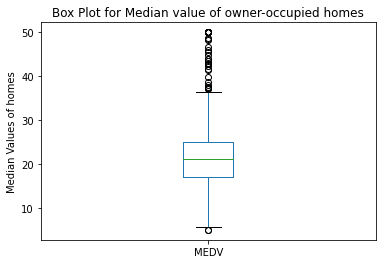

In [5]:
boston_df['MEDV'].plot(kind='box')
plt.title('Box Plot for Median value of owner-occupied homes')
plt.ylabel('Median Values of homes')
plt.show()

From the boxplot we can find that the median, 1st quartile and 3rd quartile of the data are located between 17 to 25, thus the median values of the owner occupied homes would most likely be between 17-25. Also, the minimum and maximum values would be 3 and 50.

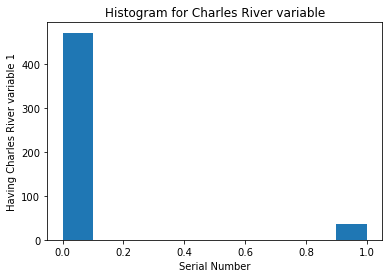

In [6]:
boston_df['CHAS'].plot(kind='hist')
plt.title('Histogram for Charles River variable')
plt.ylabel('Having Charles River variable 1')
plt.xlabel('Serial Number')
plt.show()

From the histogram, we can find out that most of the data is located on 0 and those are not bound by Charles river. Only a small amount of data have the value 1, which are bound by Charles river.

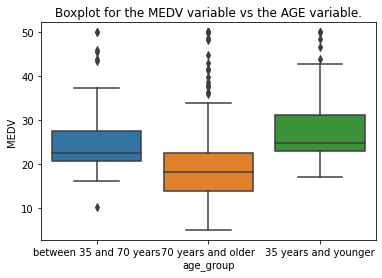

In [23]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df).set_title('Boxplot for the MEDV variable vs the AGE variable.')

From the boxplot, we can see that the age group is divided into three subgroups here. In the 1st plot which is (<=35), we can see the that the minimum is 17 and the maximum is 50. In the 2nd plot which is (35-70), the minimum is 3 and the maximum is 50. In the 3rd plot(>=70), the minimum is 18 and the maximum is 50 .

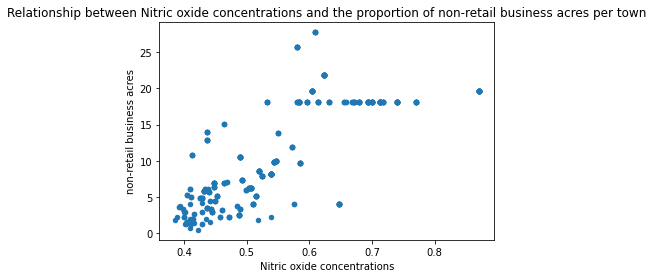

In [22]:
boston_df.plot(kind='scatter', x='NOX', y='INDUS')
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel('Nitric oxide concentrations')
plt.ylabel('non-retail business acres')
plt.show()

There seems to be a positive linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

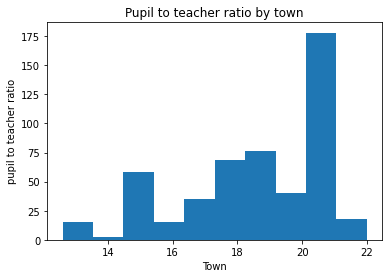

In [24]:
boston_df['PTRATIO'].plot(kind='hist')
plt.title('Pupil to teacher ratio by town')
plt.xlabel('Town')
plt.ylabel('pupil to teacher ratio')
plt.show()

From the histogram, we can conclude that the majority ratio is between 20-22

### T-Test: Using the Housing Prices data set, is there a significant difference in median value of houses bounded by the Charles river or not?

We will be using the t-test for independent samples.

-   One independent, categorical variable with two levels or group = Charles River variables CHAS
-   One dependent continuous variable = Median Value of houses MEDV

State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river and those not bounded by Charles river")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by the Charles river and those not bounded by Charles river")

α = 0.05

In [10]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median values of houses based on the Charles River variable.

### ANOVA: Using the Housing Prices data set, is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

First, we group the data into categories as the one-way ANOVA can't work with continuous variable. We have already created a new column for this newly assigned group our categories will be houses that are:

-   35 years and younger
-   between 35 and 70 years
-   70 years and older

State the hypothesis

-   $H_0: µ_1 = µ_2 = µ_3$ (the three means are equal)
-   $H_1:$ At least one of the means differ

α = 0.05

In [11]:
#Test for equality of variance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is more than 0.05, the variance is equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [14]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [15]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### Pearson Correlation: Using the Housing Prices data set, can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

State the hypothesis:

-   $H_0:$ The proportion of non-retail business acres per town is independent of Nitric oxide concentrations
-   $H_1:$ The proportion of non-retail business acres per town is associated with Nitric oxide concentrations

α = 0.05

In [16]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value < 0.05, we reject the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### Regression Analysis: Using the Housing Prices data set, What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

State the hypothesis:

-   $H_0: β1$ = 0 (Additional weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes)
-   $H_1: β1$ is not equal to 0 (Additional weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes)

α = 0.05

In [18]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           1.21e-08
Time:                        06:47:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.